<a href="https://colab.research.google.com/github/hamagami/is2021/blob/main/support_vector_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple SVM sample

This code directly codes a linear SVM. When you actually use SVM, the code should be more complex for nonlinear problems. Still, this simple code should give you an idea of what SVM is doing.
In fact, using the SVM module of sklearn (python's machine learning library), you can develop an SVM application in just a few lines.
Ref:
https://towardsdatascience.com/support-vector-machine-python-example-d67d9b63f1c8

In [16]:
!pip install cvxopt
# cvxopt is a numerical calculation library. It is used to solve quadratic programming problems.

In [17]:
import numpy as np
import cvxopt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

## SVM class

In [18]:
class SVM:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # P = X^T X
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = np.dot(X[i], X[j])
        P = cvxopt.matrix(np.outer(y, y) * K)
        # q = -1 (1xN)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        # A = y^T
        A = cvxopt.matrix(y, (1, n_samples))
        # b = 0
        b = cvxopt.matrix(0.0)
        # -1 (NxN)
        G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
        # 0 (1xN)
        h = cvxopt.matrix(np.zeros(n_samples))
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)
        # Lagrange multipliers
        a = np.ravel(solution['x'])
        # Lagrange have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n], sv])
        self.b /= len(self.a)
        # Weights
        self.w = np.zeros(n_features)
        for n in range(len(self.a)):
            self.w += self.a[n] * self.sv_y[n] * self.sv[n]

    def project(self, X):
        return np.dot(X, self.w) + self.b


    def predict(self, X):
        return np.sign(self.project(X))

## Line generator

In [19]:
def f(x, w, b, c=0):
    return (-w[0] * x - b + c) / w[1]

## generate dataset

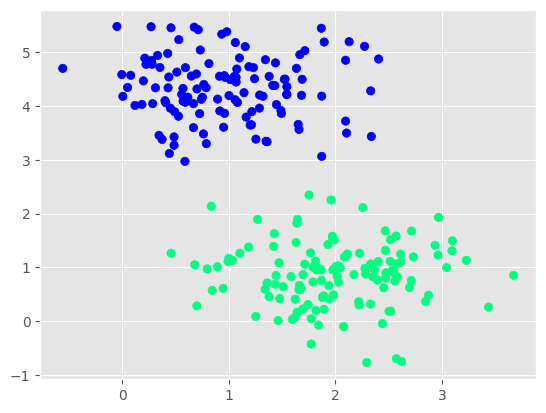

In [20]:
X, y = make_blobs(n_samples=250, centers=2,
                  random_state=0, cluster_std=0.60)
y[y == 0] = -1
tmp = np.ones(len(X))
y = tmp * y

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Exec SVM fitting

In [22]:
svm = SVM()
svm.fit(X_train, y_train)

     pcost       dcost       gap    pres   dres
 0: -1.8226e+01 -3.4458e+01  6e+02  2e+01  2e+00
 1: -2.5252e+01 -1.8773e+01  2e+02  9e+00  7e-01
 2: -5.3459e+01 -3.2711e+01  2e+02  7e+00  6e-01
 3: -7.8360e+01 -2.6482e+01  1e+02  4e+00  3e-01
 4: -5.6818e+00 -5.1750e+00  1e+01  2e-01  1e-02
 5: -3.6906e+00 -4.1082e+00  4e-01  4e-16  1e-14
 6: -4.0061e+00 -4.0104e+00  4e-03  9e-16  5e-15
 7: -4.0094e+00 -4.0094e+00  4e-05  6e-16  6e-15
 8: -4.0094e+00 -4.0094e+00  4e-07  2e-15  5e-15
Optimal solution found.


## Draw the discriminate boundary.

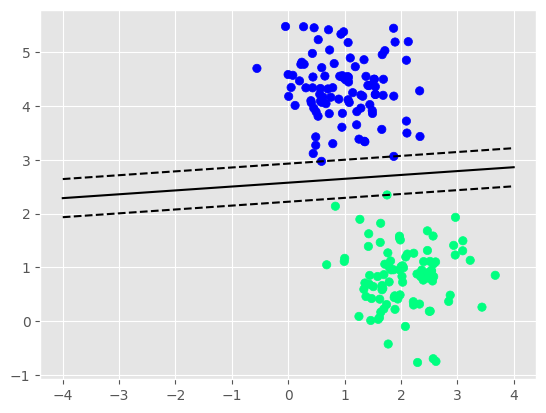

In [23]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter')
# w.x + b = 0
a0 = -4; a1 = f(a0, svm.w, svm.b)
b0 = 4; b1 = f(b0, svm.w, svm.b)
plt.plot([a0,b0], [a1,b1], 'k')
# w.x + b = 1
a0 = -4; a1 = f(a0, svm.w, svm.b, 1)
b0 = 4; b1 = f(b0, svm.w, svm.b, 1)
plt.plot([a0,b0], [a1,b1], 'k--')
# w.x + b = -1
a0 = -4; a1 = f(a0, svm.w, svm.b, -1)
b0 = 4; b1 = f(b0, svm.w, svm.b, -1)
plt.plot([a0,b0], [a1,b1], 'k--')

# SVM by sklearn library

In [24]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import numpy as np
iris = datasets.load_iris() # IRIS dataset

In [25]:
X = iris.data[:, [2,3]] #Used in 2D data for 3rd and 4th features
y = iris.target #class label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None )

## Data standardization is very important for SVM.

In [26]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## SVM by sklearn

In [27]:
model = SVC(kernel='linear', random_state=None)
model.fit(X_train_std, y_train)

SVC(kernel='linear')

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

fig = plt.figure(figsize=(13,8))
plot_decision_regions(X_combined_std, y_combined, clf=model)
plt.show()